In [18]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential

import tensorflow.keras as k

import joblib

In [2]:
#reading train dataset
df = pd.read_csv('train.csv')
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [3]:
label = ['condition']
features = ['MEAN_RR' , 'RMSSD' , 'pNN25' , 'pNN50' , 'LF' , 'HF' , 'LF_HF']

In [4]:
scaler = StandardScaler()
scaler.fit(df[features])
df[features] = scaler.transform(df[features])

In [5]:
X = df[features].values
y = df[label].values

In [6]:
X_train, X_test , y_train , y_test = tts(X , y , test_size=0.3 , random_state=1441)

In [7]:
y_train = k.utils.to_categorical(y_train)
y_test = k.utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Dense(50 , activation='relu' , kernel_initializer='he_normal' , input_shape=(X_train.shape[1],)))
model.add(Dense(20 , activation='relu' , kernel_initializer='he_normal'))
model.add(Dense(10 , activation='relu' , kernel_initializer='he_normal'))
model.add(Dense(3 , activation='softmax'))

D:\projects\Data Science\DiamondSellPrice\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [11]:
history = model.fit(X_train , y_train , validation_data=(X_test , y_test) , epochs=50 , batch_size=1024 , verbose=1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5946 - loss: 0.8960 - val_accuracy: 0.6704 - val_loss: 0.7243
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6892 - loss: 0.6882 - val_accuracy: 0.7553 - val_loss: 0.5804
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7710 - loss: 0.5466 - val_accuracy: 0.8090 - val_loss: 0.4720
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8160 - loss: 0.4555 - val_accuracy: 0.8303 - val_loss: 0.4170
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8368 - loss: 0.4057 - val_accuracy: 0.8490 - val_loss: 0.3779
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8523 - loss: 0.3695 - val_accuracy: 0.8594 - val_loss: 0.3502
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3435 - val_accuracy: 0.8711 - val_loss: 0.3275
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8747 - loss: 0.3219 - val_accuracy: 0.

<Axes: >

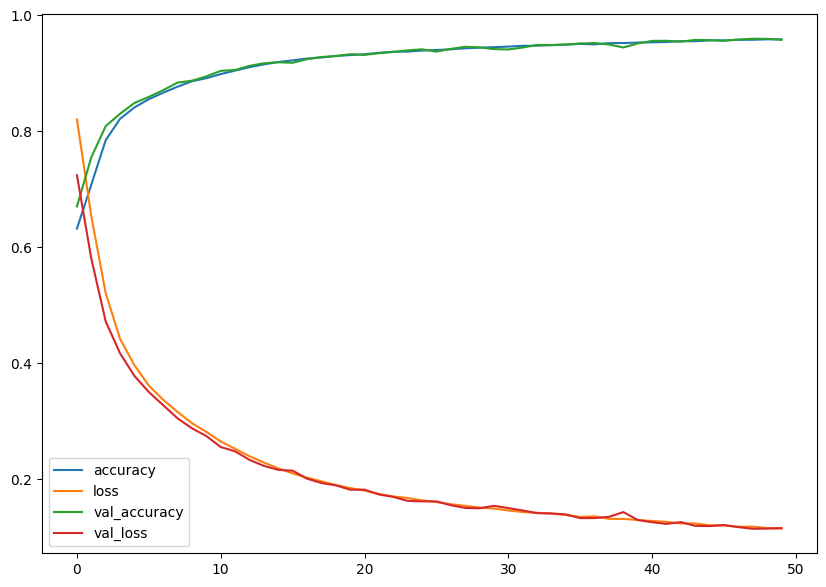

In [12]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [13]:
df_test = pd.read_csv('test.csv')
df_test[features] = scaler.transform(df_test[features])

X = df_test[features].values
y = df_test[label].values

y = k.utils.to_categorical(y)

In [14]:
loss , acc = model.evaluate(X , y , verbose=1)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9584 - loss: 0.1143


In [15]:
data = pd.read_csv('test.csv')
t = scaler.transform(data[features].iloc[5545].values.reshape(1 , -1))
print(t)

[[-0.7699341   0.25391942  0.11699709  0.60661783  0.54497884  0.50787441
  -0.26537627]]


D:\projects\Data Science\DiamondSellPrice\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
y_pred = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [17]:
print(np.argmax(y_pred[0]))
print(data[label].iloc[5545])

0
condition    0
Name: 5545, dtype: int64


In [20]:
if np.argmax(y_pred[0]) == 0:
    print('No Stress')
else:
    print('Stress')

No Stress


In [19]:
joblib.dump(scaler , 'scaler.joblib' , compress=9)
model.save('model.h5')